In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data

In [2]:
df_covid_tweets = pd.read_csv('covid_tweets_overview.csv')
df_covid_tweets_stats = df_covid_tweets.copy()

df_covid_tweets_stats = df_covid_tweets_stats.drop(['screen_name'], axis='columns')
df_covid_tweets_stats.rename(columns={'covid_tweets':'tweets'}, inplace = True)
df_covid_tweets_sum = df_covid_tweets_stats[['party','tweets']].groupby(['party']).sum()

df_non_covid_tweets = pd.read_csv('non_covid_tweets.csv')
df_non_covid_tweets_stats = df_non_covid_tweets.copy()
df_non_covid_tweets_stats = df_non_covid_tweets_stats.drop(['created at', 'tweet'], axis='columns')
df_non_covid_tweets_sum = df_non_covid_tweets_stats.reset_index().groupby(['party']).size()
df_non_covid_tweets_sum = df_non_covid_tweets_sum.to_frame()
df_non_covid_tweets_sum = df_non_covid_tweets_sum.rename(columns = {0:'tweets'})

concatenated = pd.concat([df_covid_tweets_sum.assign(dataset='covid_tweets'), df_non_covid_tweets_sum.assign(dataset='non_covid_tweets')])

party_colors = {
    'SPD': 'red',
    'CDU': 'black',
    'AfD': 'blue',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'Die Linke': 'purple',
    'CSU': 'lightblue',
    'Fraktionslos': 'grey'
}

# Number of Total Covid-Tweets per Party

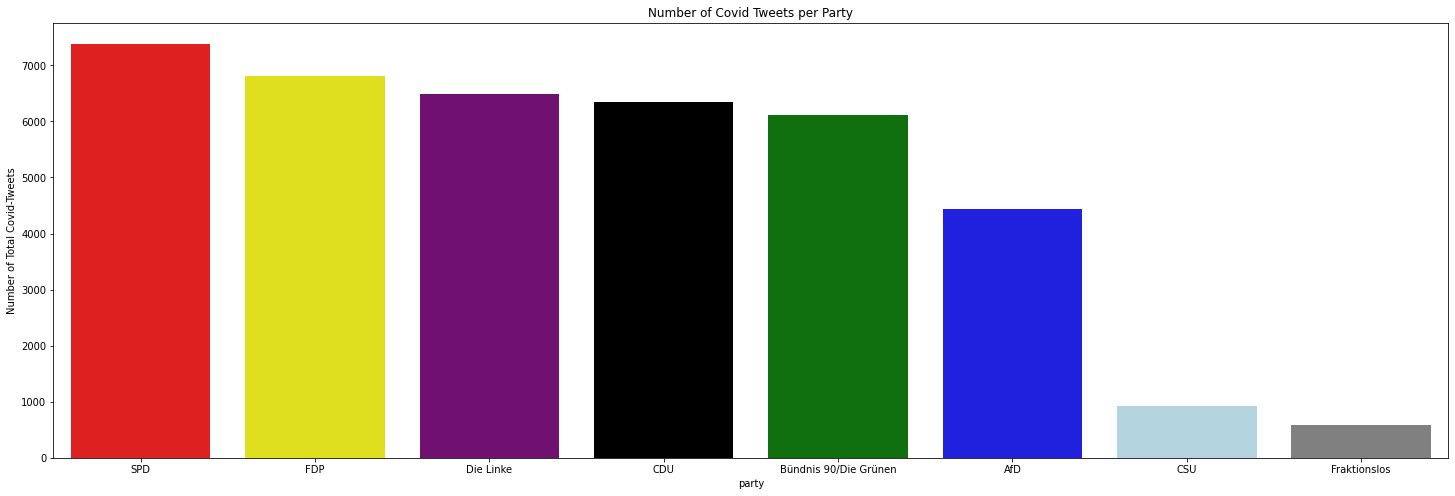

In [3]:
df_covid_tweets_sum.reset_index(inplace=True)
fig = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=df_covid_tweets_sum,
                    x='party',
                    y='tweets',
                    order=df_covid_tweets_sum.sort_values('tweets', ascending=False).party,
                    palette=party_colors)
chart.set(ylabel='Number of Total Covid-Tweets',
          title='Number of Covid Tweets per Party')
plt.show()

# Number of Mean Covid-Tweets per Party

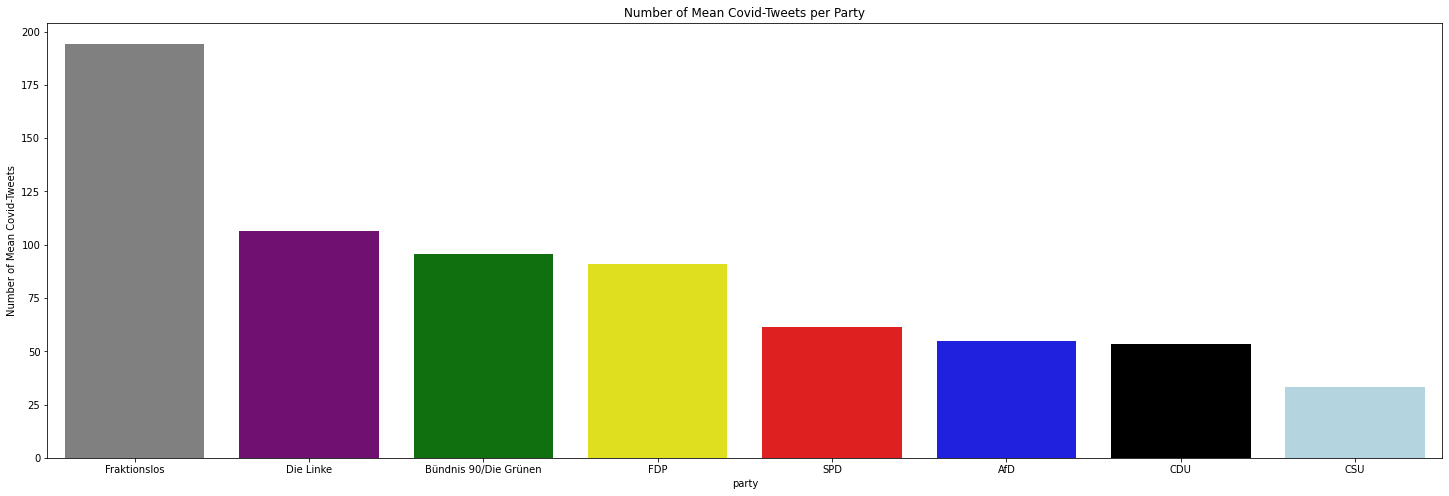

In [4]:
df_covid_tweets_mean = df_covid_tweets_stats[['party','tweets']].groupby(['party']).mean()
df_covid_tweets_mean.reset_index(inplace=True)
fig = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=df_covid_tweets_mean,
                    x='party',
                    y='tweets',
                    order=df_covid_tweets_mean.sort_values('tweets', ascending=False).party,
                    palette=party_colors)
chart.set(ylabel='Number of Mean Covid-Tweets',
          title='Number of Mean Covid-Tweets per Party')
plt.show()

# Number of Median Covid-Tweets per Party

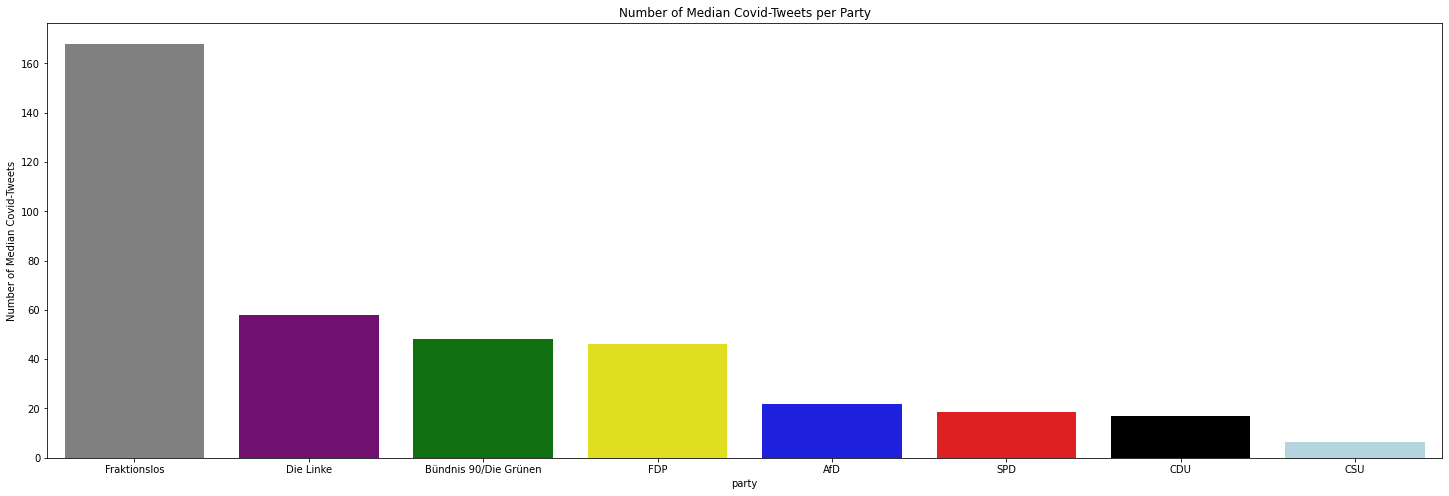

In [5]:
df_covid_tweets_median = df_covid_tweets_stats[['party','tweets']].groupby(['party']).median()
df_covid_tweets_median.reset_index(inplace=True)
fig = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=df_covid_tweets_median,
                    x='party',
                    y='tweets',
                    order=df_covid_tweets_median.sort_values('tweets', ascending=False).party,
                    palette=party_colors)
chart.set(ylabel='Number of Median Covid-Tweets',
          title='Number of Median Covid-Tweets per Party')
plt.show()

# Number of Total Tweets/ Covid-Tweets per Party (Barchart)

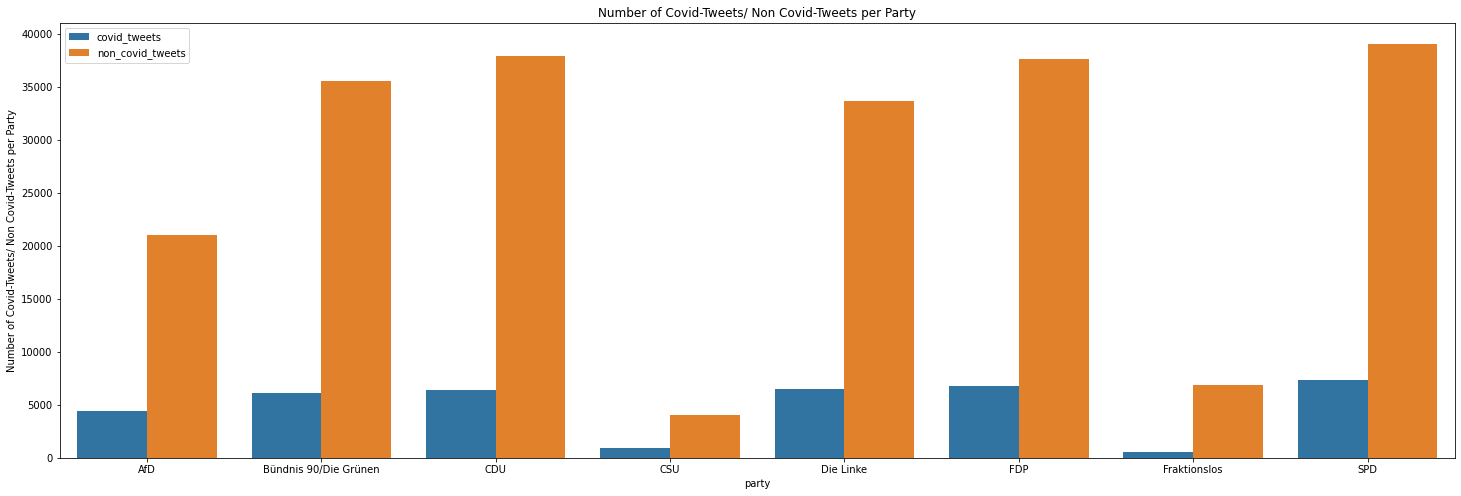

In [6]:
concatenated.reset_index(inplace=True)
fig = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=concatenated,
                    x='party',
                    y='tweets',
                    hue='dataset')
chart.set(ylabel='Number of Covid-Tweets/ Non Covid-Tweets per Party',
          title='Number of Covid-Tweets/ Non Covid-Tweets per Party')
plt.legend(loc='best')
plt.show()


# Number of Covid-Tweets per Party (Boxplot with outliers)

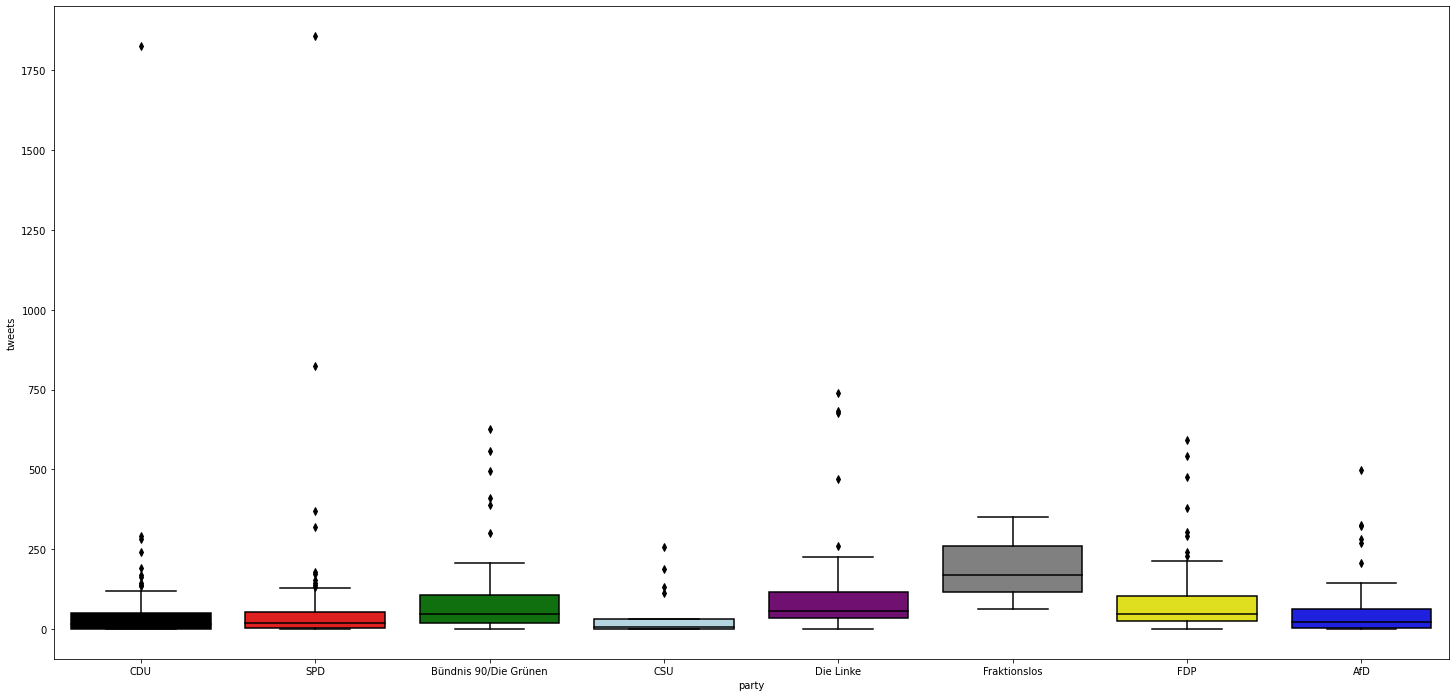

In [7]:
plt.figure(figsize=(25, 12))
chart = sns.boxplot(data=df_covid_tweets_stats,
                    x='party',
                    y='tweets',
                    palette=party_colors)
plt.show()


# Number of Covid-Tweets per Party (Boxplot without outliers)

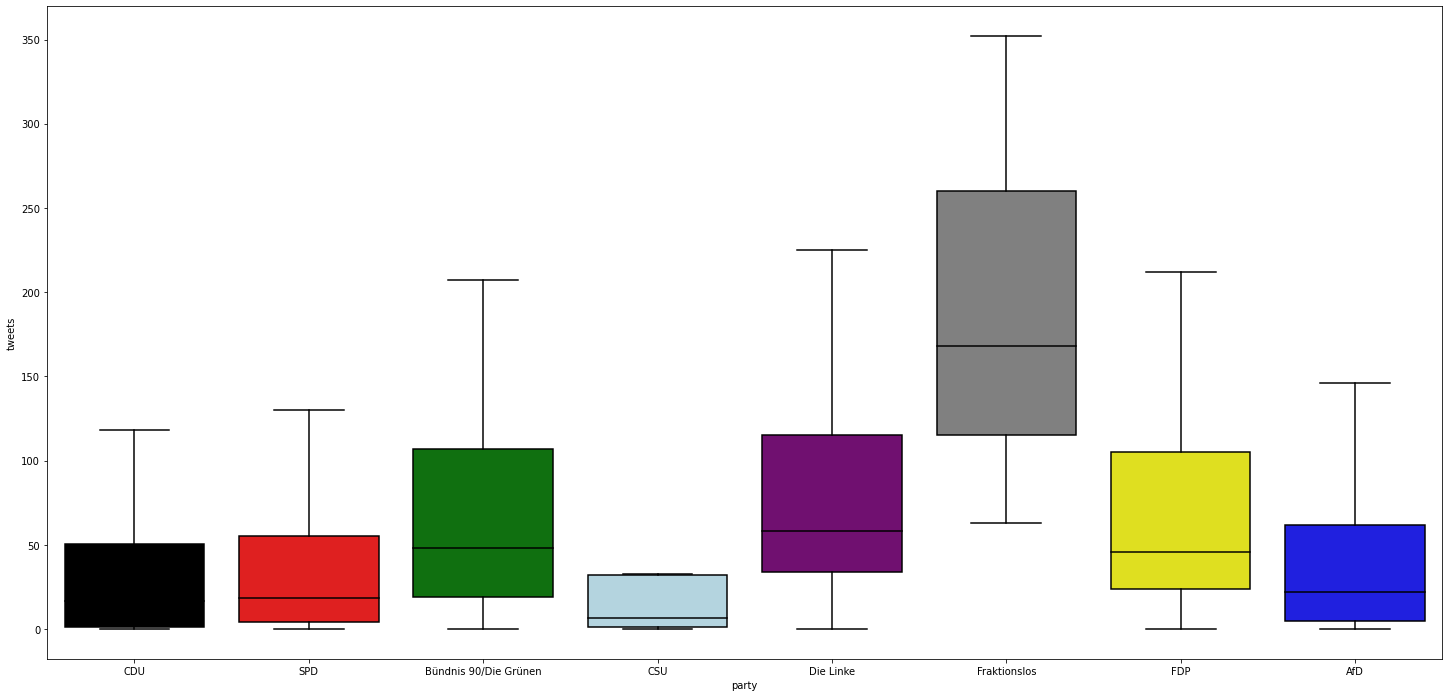

In [8]:
plt.figure(figsize=(25, 12))
chart = sns.boxplot(data=df_covid_tweets_stats,
                    x='party',
                    y='tweets',
                    showfliers = False,
                    palette=party_colors)
plt.show()


# Number of Top Tweeters per Party

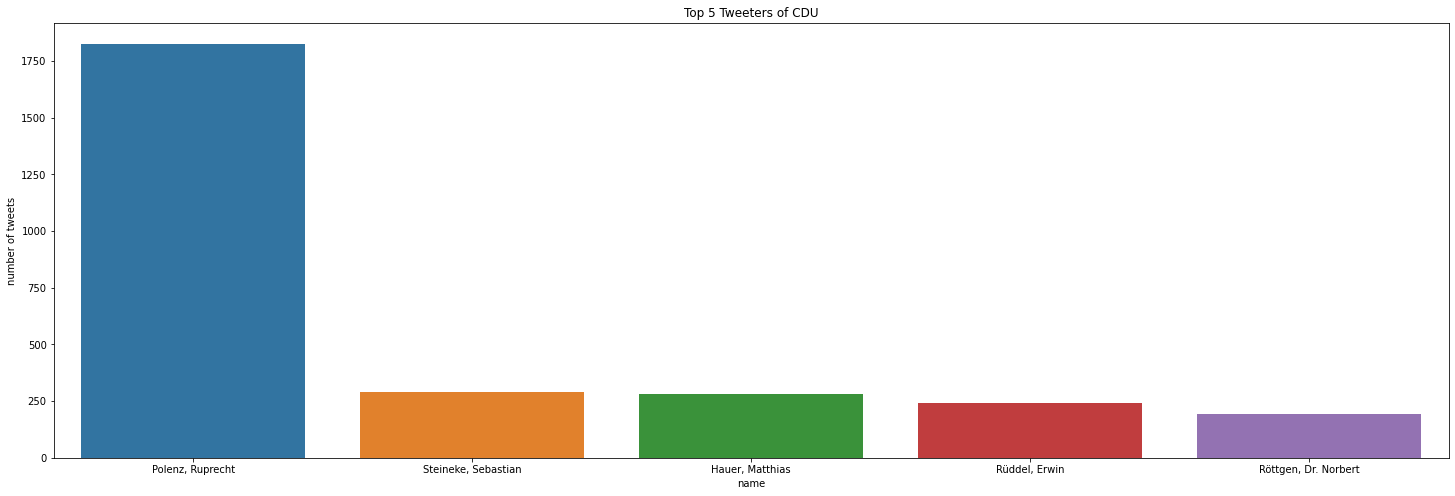

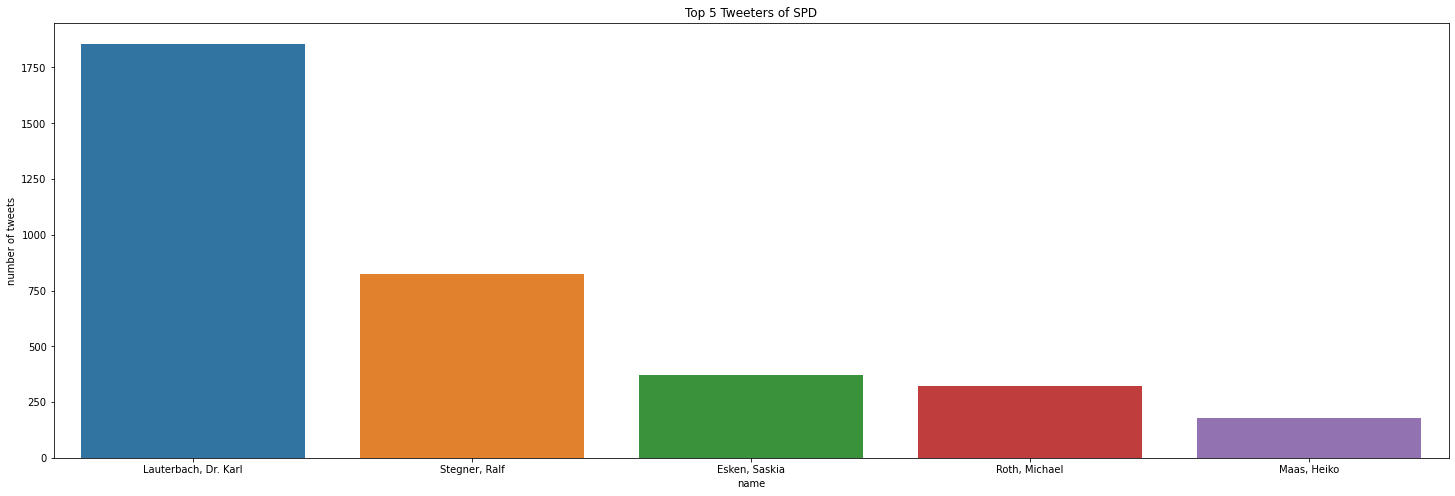

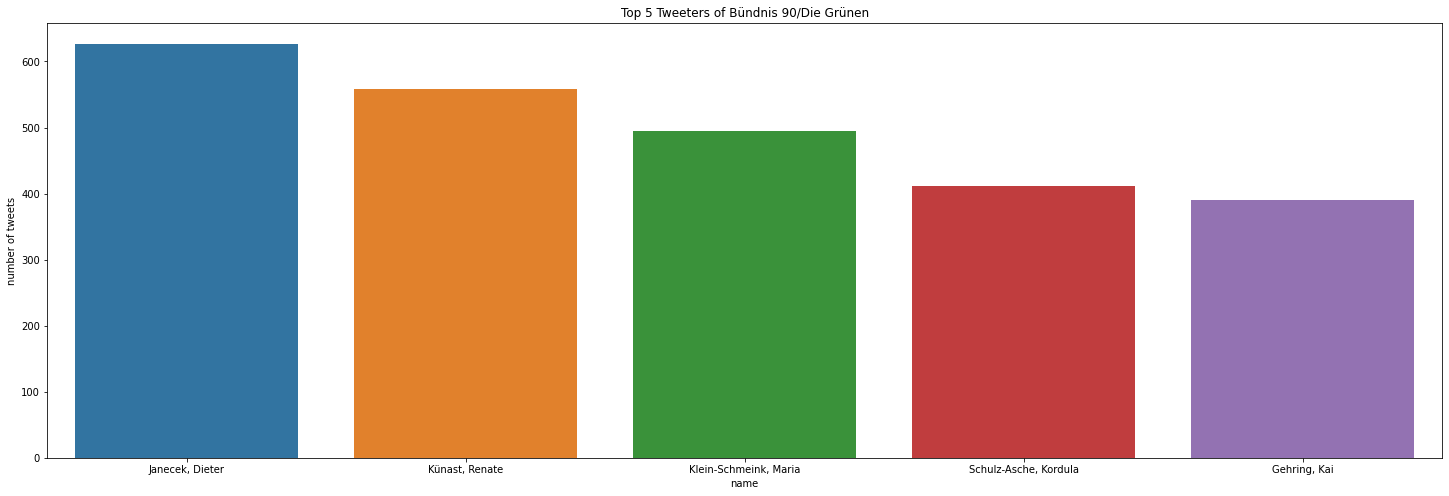

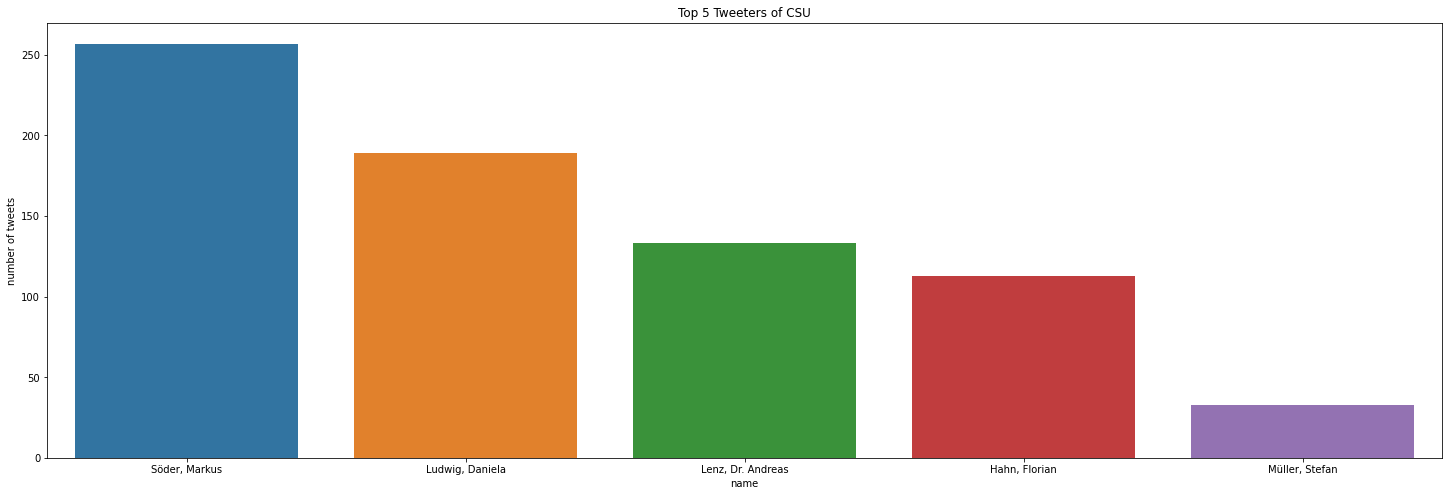

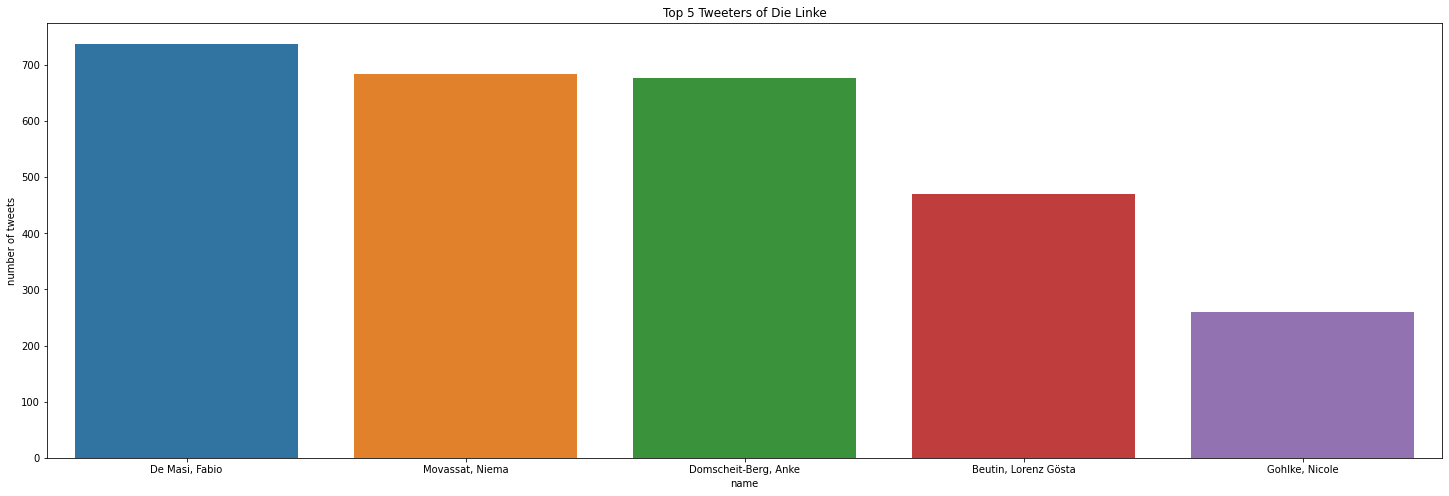

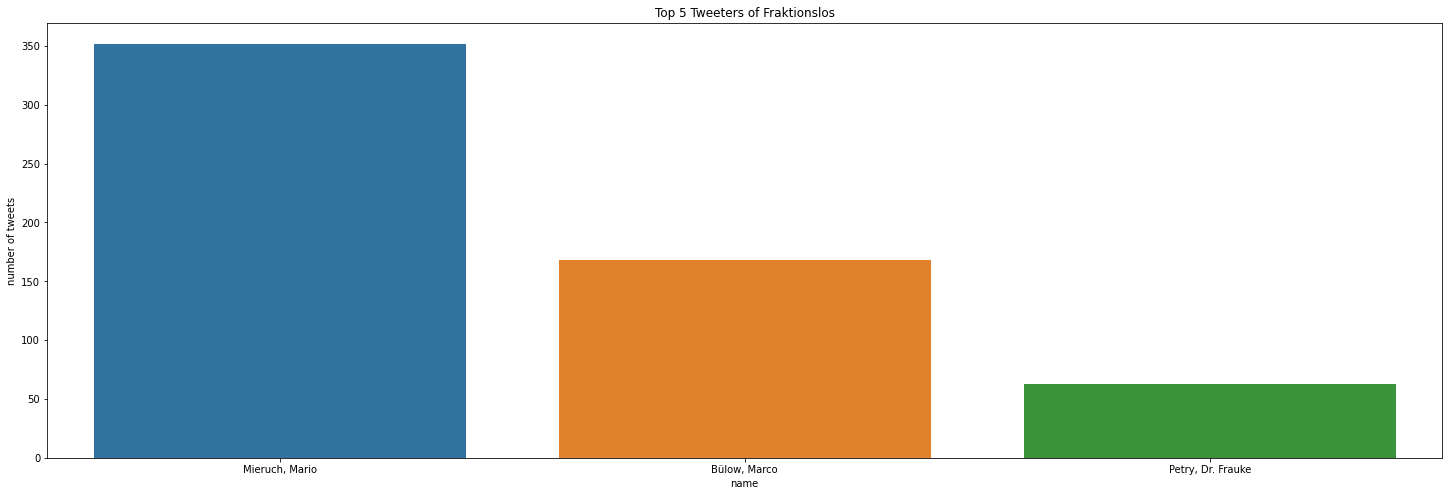

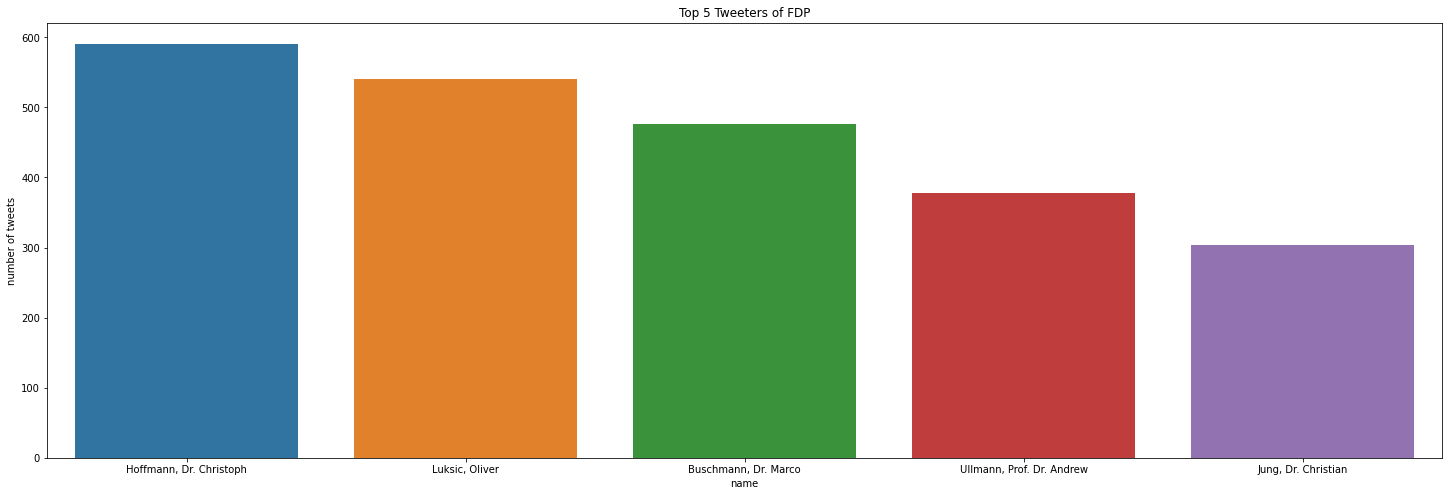

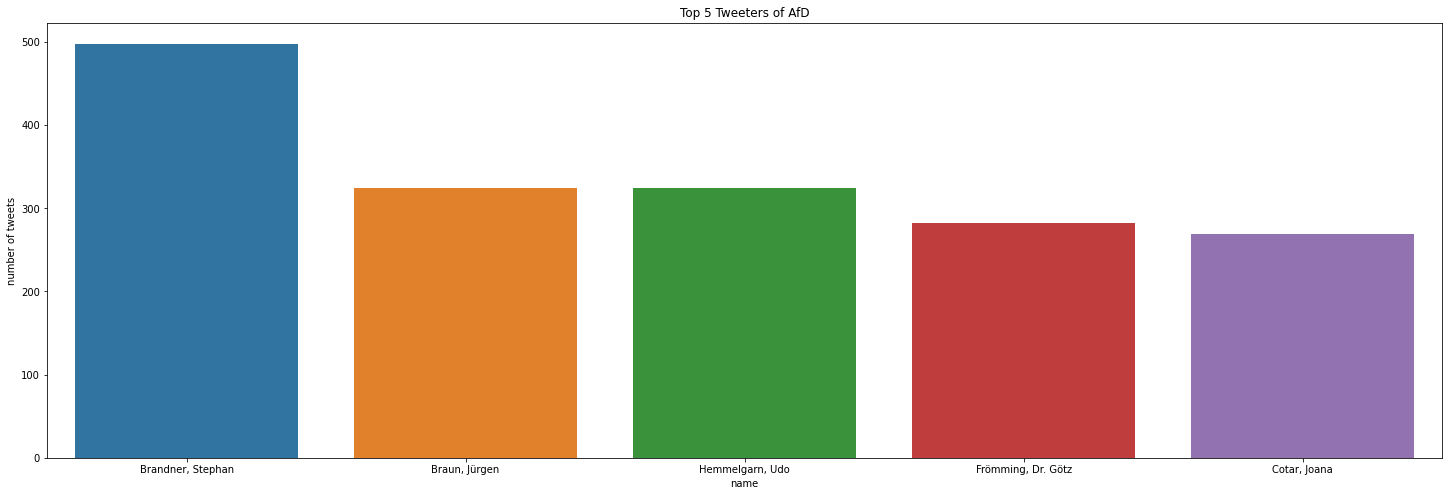

In [9]:
number_of_top_tweeters = 5
parties = df_covid_tweets['party'].unique()
for p in parties:
    politicians_per_party = df_covid_tweets_stats[df_covid_tweets_stats['party'] == p].sort_values(by='tweets', ascending=False).head(number_of_top_tweeters)
    fig = plt.figure(figsize=(25, 8))
    chart = sns.barplot(data=politicians_per_party,
                        x='name',
                        y='tweets')
    chart.set(ylabel='number of tweets',
              title=f'Top {number_of_top_tweeters} Tweeters of {p}')
    plt.show()